<a href="https://colab.research.google.com/github/mbasant330/datascience/blob/main/turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Turnover Prediction - Classification
Employee Turnover is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.<br>

A Company uses this predictive analysis to measure how many employees they will need if the potential employees will leave their organization. A company also uses this predictive analysis to make the workplace better for employees by understanding the core reasons for the high turnover ratio.<br>

Here 'left' is the target (dependent) variable

## Steps

1. Import Library and Dataset
2. Data Preprocessing
    - Gethering dataset info
    - Data Statistics
    - Missing value handling 
    - columns operation
3. Categorical to Numerical 
4. Data Visualization
    - Get Insights
    - Outlier detection
    - Correlation 
5. Feature Selection
6. Train and Test Split
7. Model Building
    - Logistic Regression
    - Decision Tree
    - Random Forest
8. Model Evaluation

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [2]:
%cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


### Import Library and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('turnover.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



<br>


### Data Preprocessing

##### Data Info

In [5]:
df.shape

(14999, 10)

This dataset contains 10 columns (features) and 14999 rows (records)

##### Column list

In [6]:
df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

##### dataframe info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Here sales and salary columns are object (string) datatype

##### Missing Value Handing - Checking Null Value

In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There is no null value (NaN)

##### Data statistics

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<br>

##### Chnage the column name

In [10]:
df = df.rename(columns={'sales' : 'department'})

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### Change the columns values 

The 'department' column of the dataset has many categories, need to reduce the categories for better modelling. 
Let’s see all the categories of the department column:

In [12]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Here we can merge “technical”, “support” and “IT” columns into one column to make our analysis easier.

In [13]:
df['department']=np.where(df['department'] =='support', 'technical', df['department'])

df['department']=np.where(df['department'] =='support', 'technical', df['department'])

Changed column value of “support” and “IT” into "Technical"

<br>

### Categorical to Numerical - Feature Transformation

##### Label Encoder

In [14]:
depart = pd.get_dummies(df['department'], prefix='department', drop_first=True )
sales = pd.get_dummies(df['salary'], prefix='salary', drop_first=True )

In [15]:
df = df.join(depart)
df = df.join(sales)

Now the actual variables need to be removed after the dummy variable have been created. Column names after creating dummy variables for categorical variables:

In [16]:
cols = ['department', 'salary']
df.drop(cols, axis=1, inplace=True)

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,1,0


In [18]:
df.shape

(14999, 18)

Now this dataset contains 18 columns (features) and 14999 rows (records)

<br>

### Data Visualization

##### Gets insights

<Axes: ylabel='satisfaction_level'>

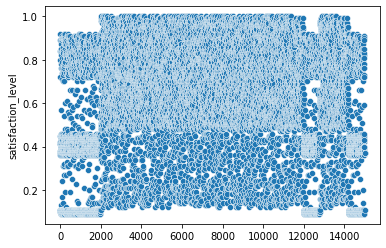

In [22]:
# sns.scatterplot(df['satisfaction_level'], df['left'])
sns.scatterplot(df['satisfaction_level'])

##### Distribution 

<ipython-input-25-fdc536c39a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-25-fdc536c39a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-25-fdc536c39a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

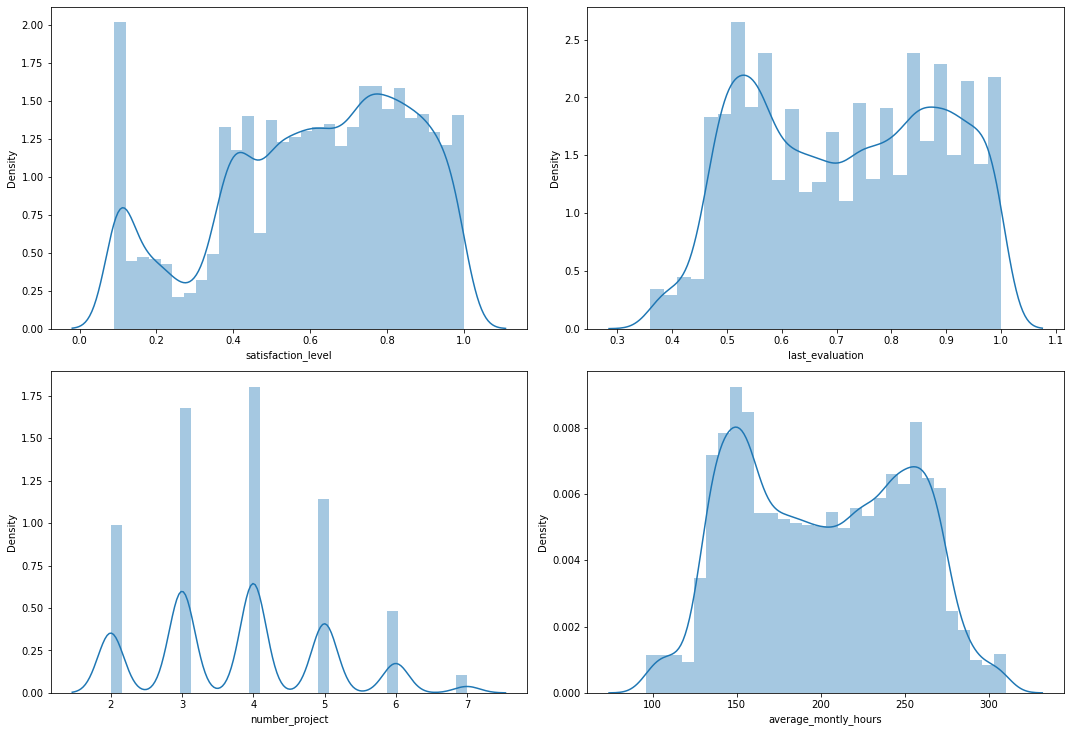

In [25]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.distplot(df[col])
    plt_num += 1
plt.tight_layout()

#### Outlier handing

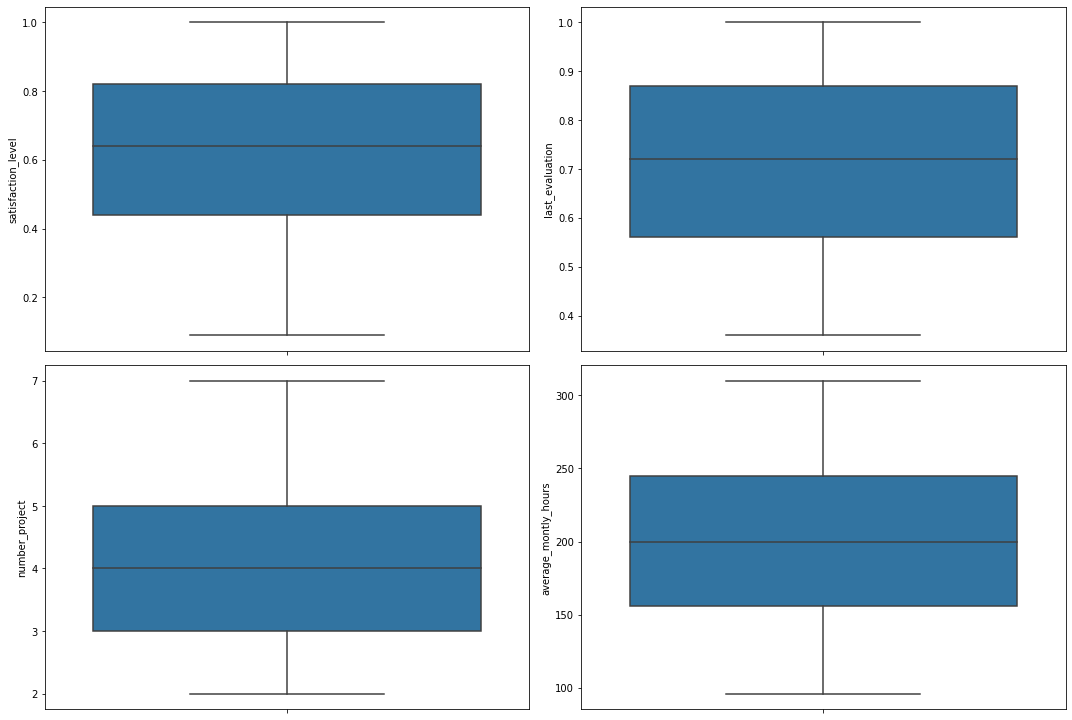

In [26]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.boxplot(y=df[col])
    plt_num += 1
plt.tight_layout()

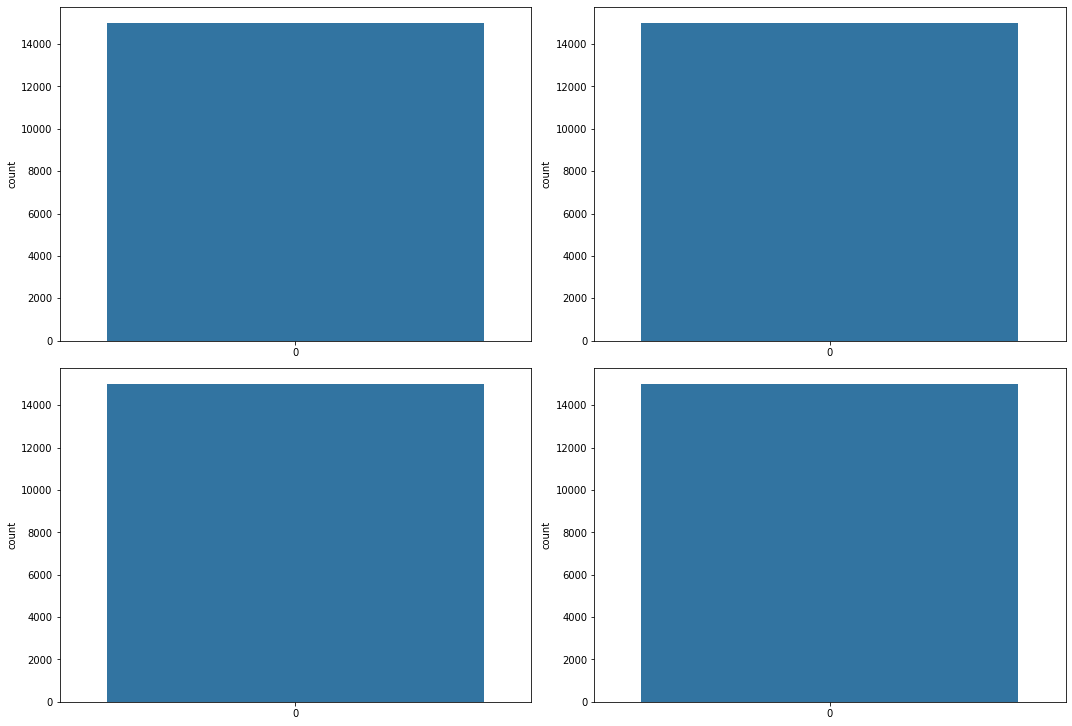

In [33]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.countplot(df[col])
    plt_num += 1
plt.tight_layout()

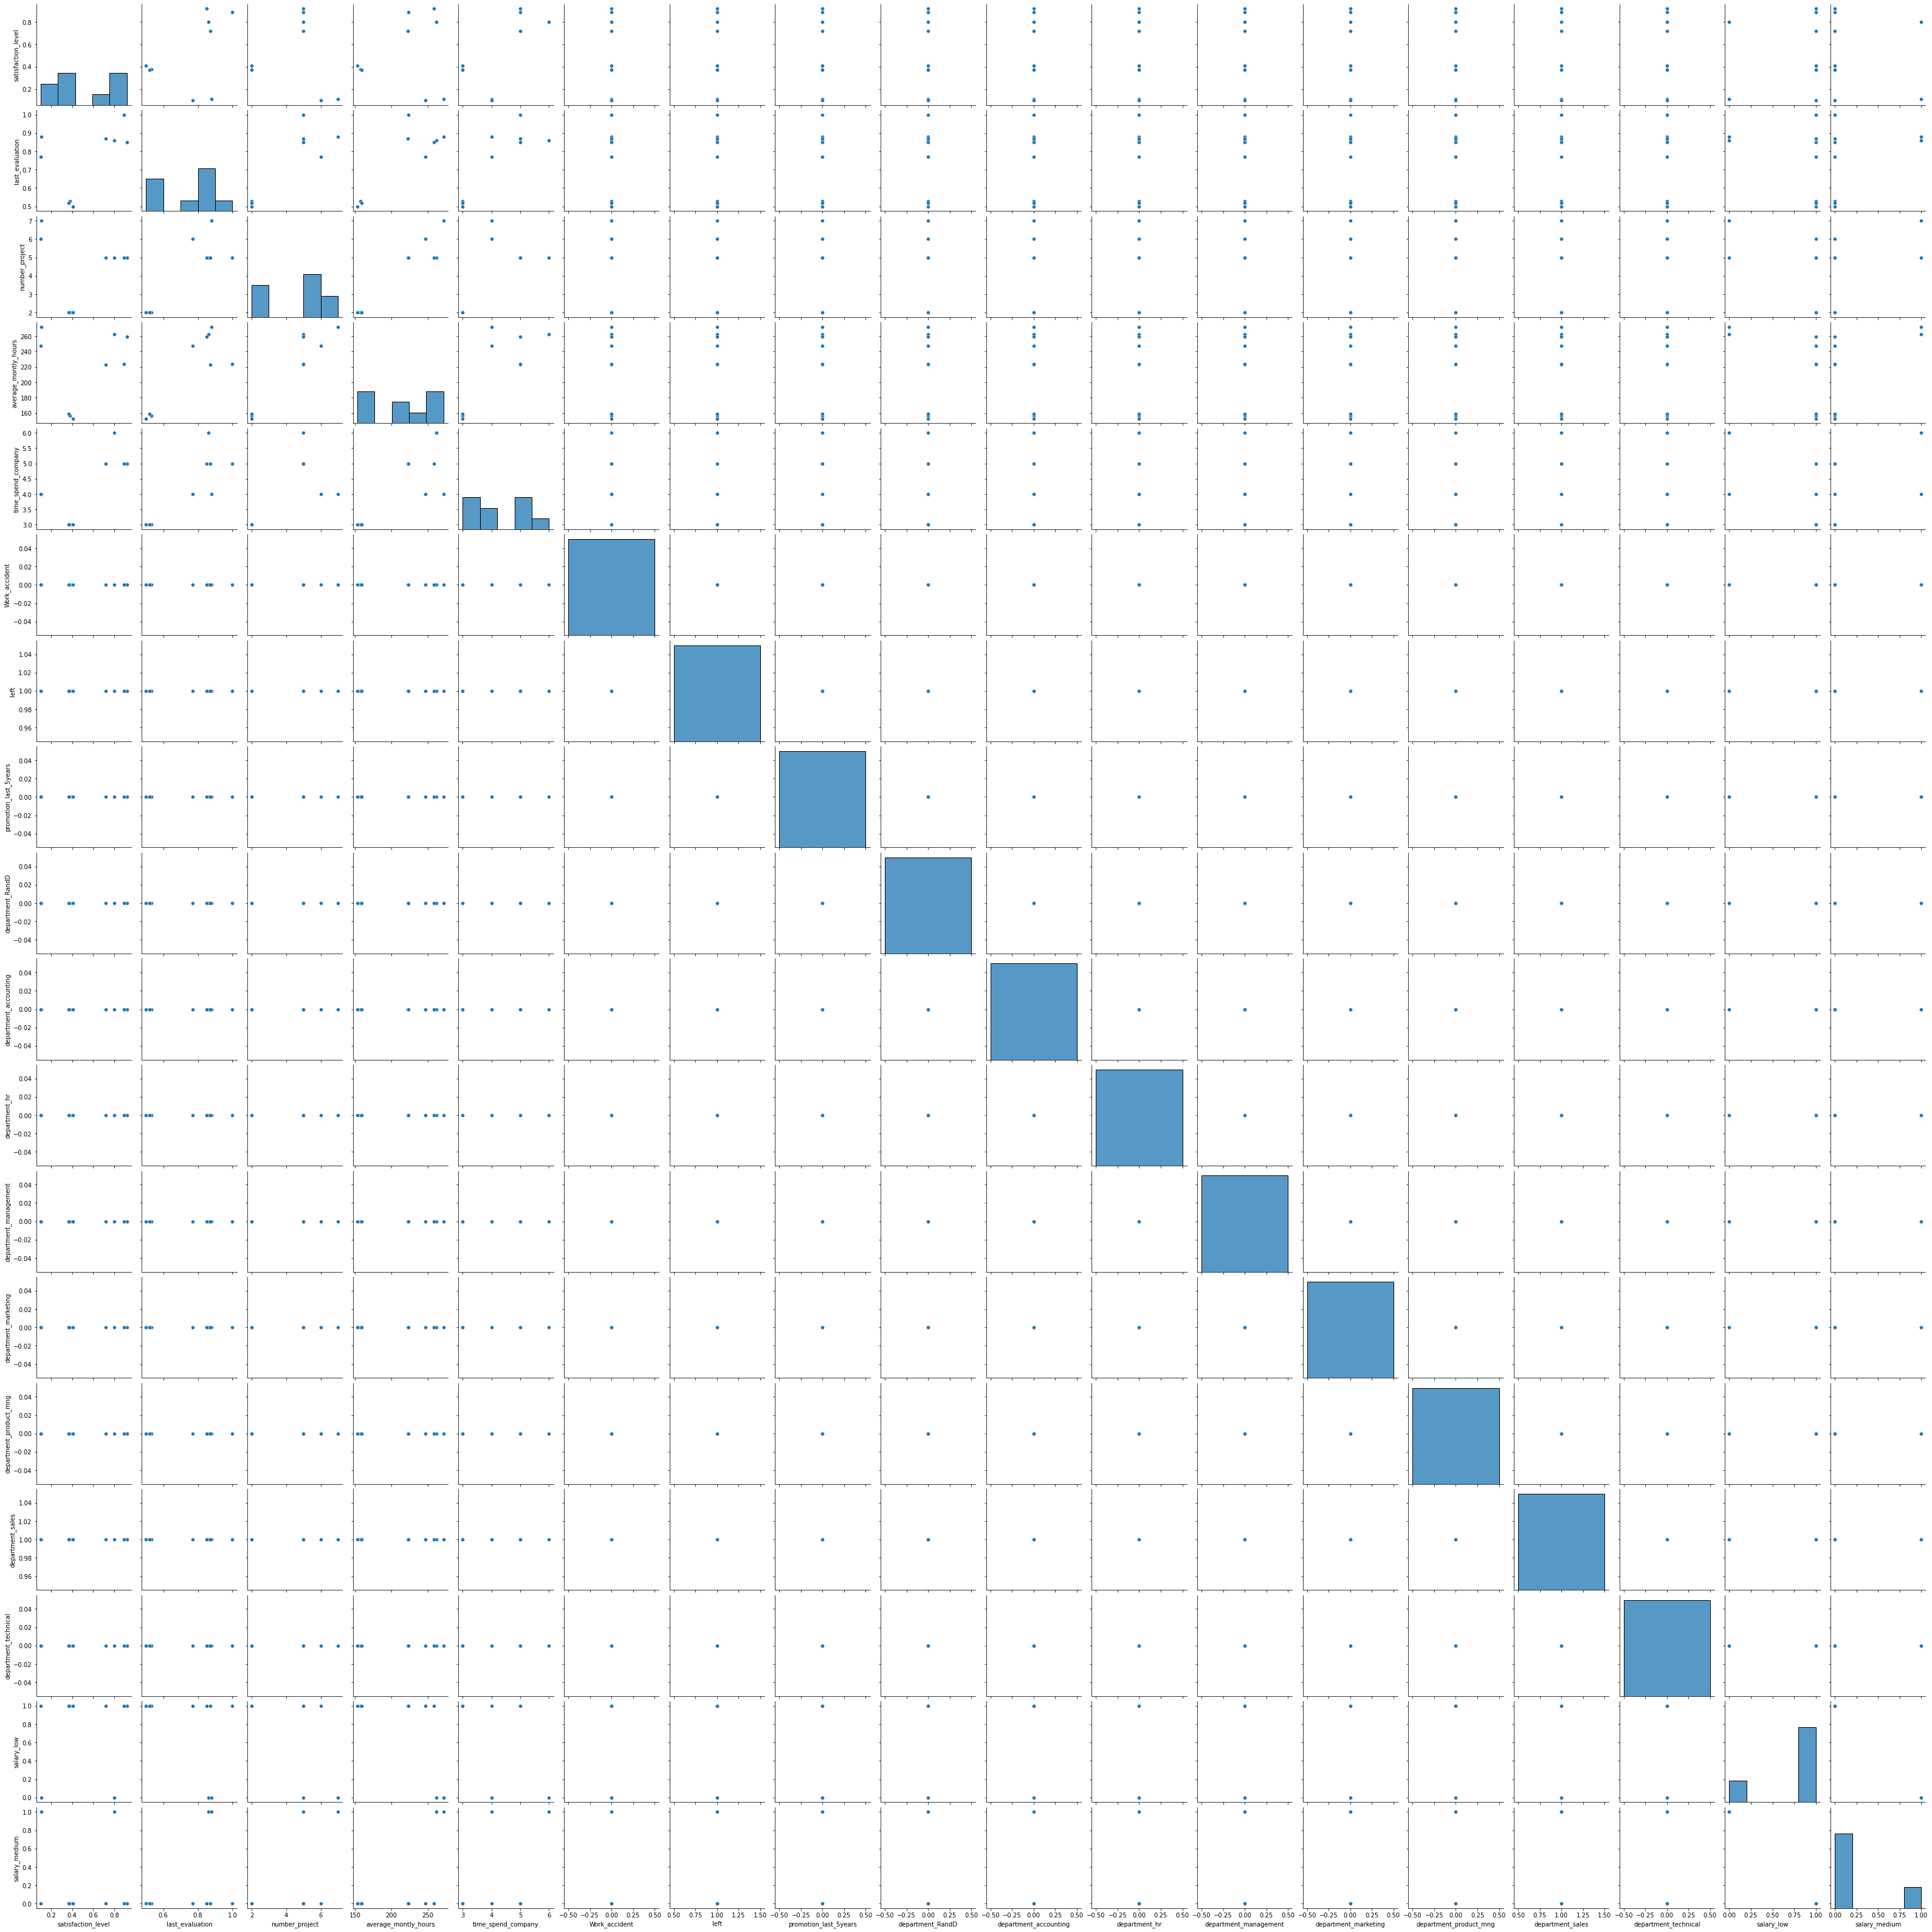

In [29]:
sns.pairplot(data=df[:9])

#### Correlation

<Axes: >

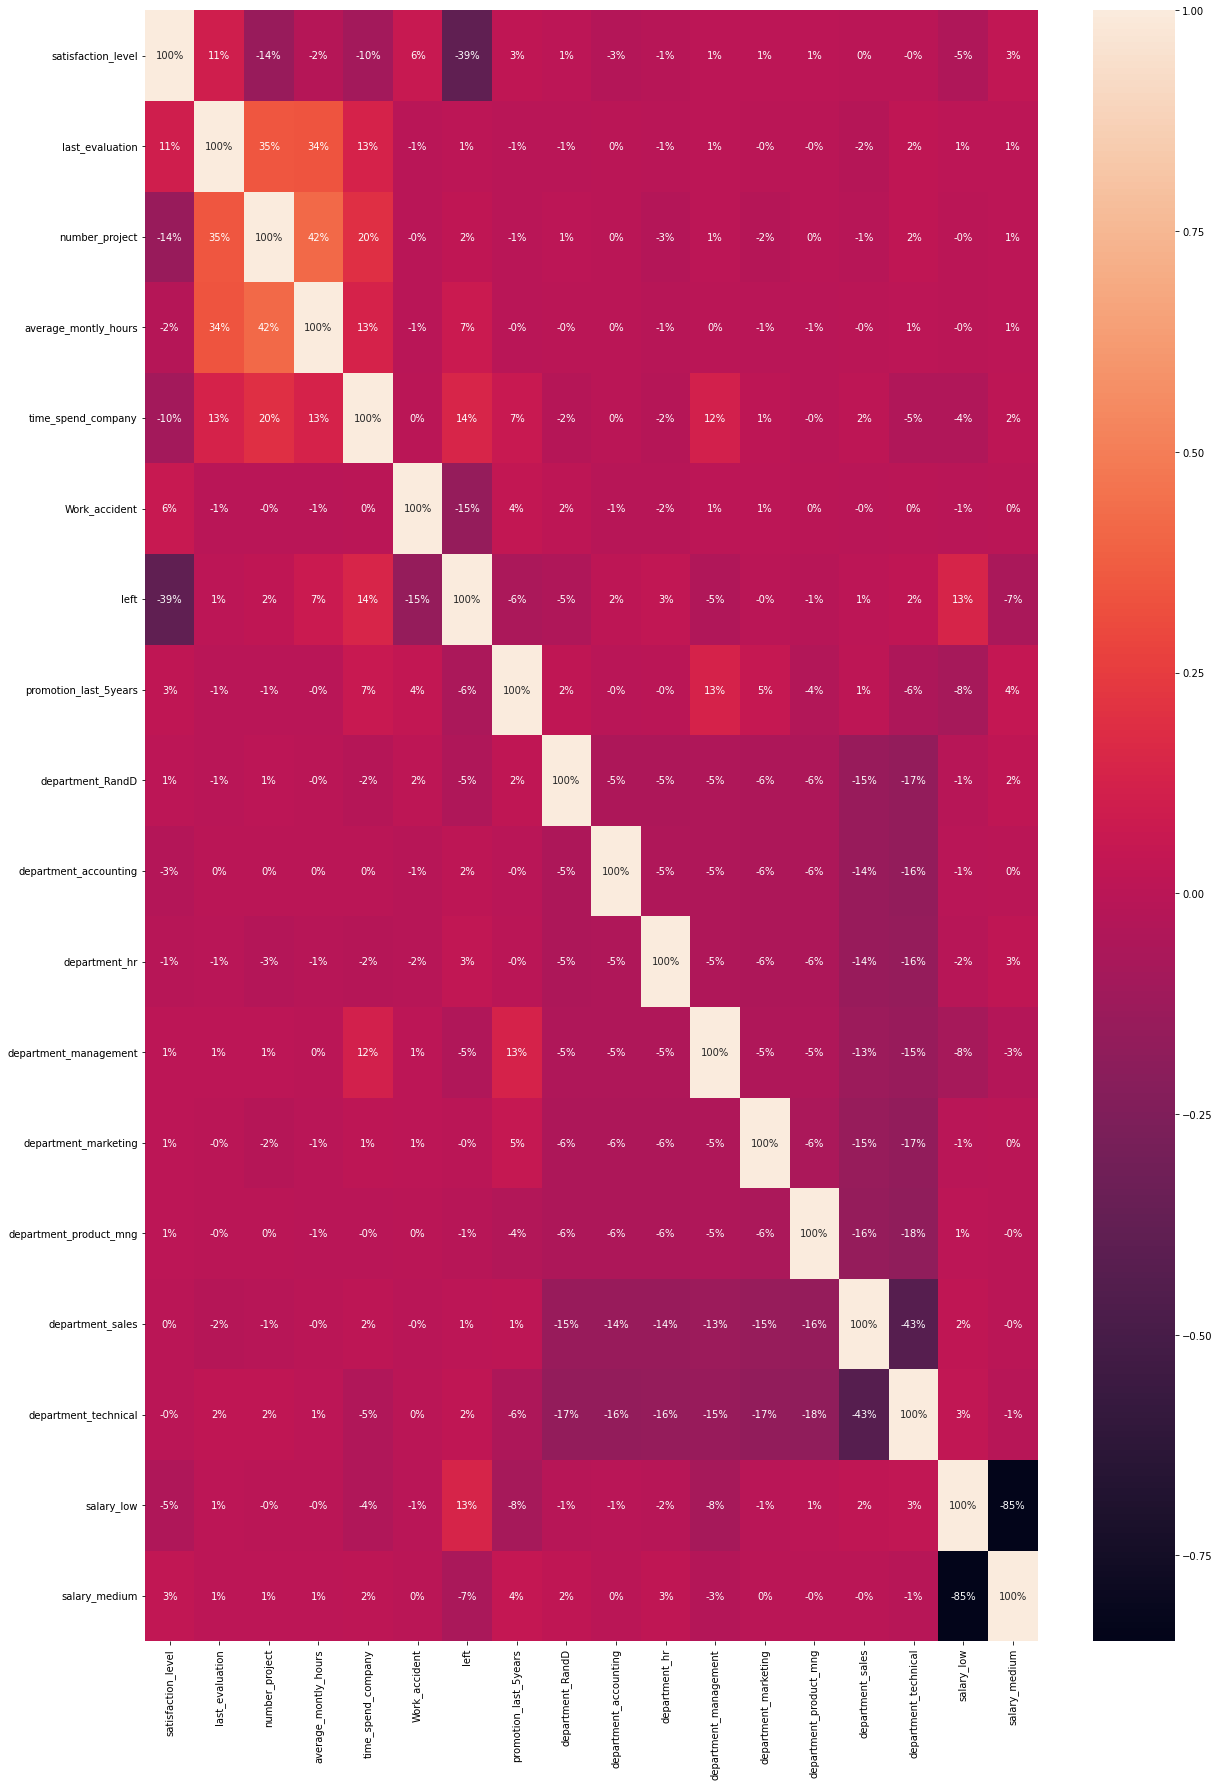

In [34]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

This heat map shows that there is no correlation

<br>

### Dependent and Independent Variables

In [35]:
X = df.drop('left', axis=1)
y = df['left']

In [36]:
len(X.columns)

17

### Feature Selection

The feature selection step decides which features are best option that can predict employee turnover with great accuracy or great performance.
There are 17 features in X, we can select about 10 from them

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True False False False False  True  True  True False  True  True False
 False False False  True  True]
[ 1  3  4 10  2  1  1  1  6  1  1  7  9  8  5  1  1]


You can see that feature selection chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. Now lets have a look at these columns:

In [40]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_low', 'salary_medium'],
      dtype='object')

In [41]:
new_cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department_RandD',
       'department_hr', 'department_management', 'salary_low', 'salary_medium']

In [42]:
X = df[new_cols]
y = df['left']

<br>

### Train and Test Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=92)

### Model Building

#### Logistics Regression

In [44]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

In [45]:
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [46]:
model_logistic.score(X_train, y_train)

0.7702638346509192

In [47]:
model_logistic.score(X_test, y_test)

0.7664444444444445

The accuracy score of the logistic regression is about 0.76 , which is not so good.

<br>

#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [49]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
model_tree.score(X_train, y_train)

0.9967615963425088

In [51]:
model_tree.score(X_test, y_test)

0.9695555555555555

The accuracy score of the Decision Tree model is about 0.97. 

<br>

#### Random Forest 

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [53]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
model_rf.score(X_train, y_train)

0.996666349176112

In [55]:
model_rf.score(X_test, y_test)

0.9857777777777778

The accuracy score of the Random Forest model is about 0.98. 

<br>

### Model Evaluation

Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification.

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3439
           1       0.97      0.97      0.97      1061

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



Text(0.5, 1.0, 'Random Forest')

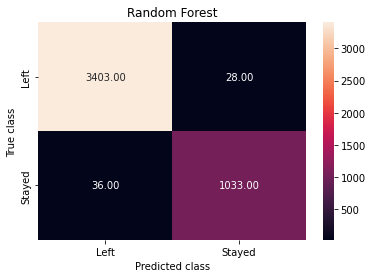

In [58]:
y_pred = model_rf.predict(X_test)

from sklearn.metrics import confusion_matrix

forest_cm = confusion_matrix(y_pred, y_test)

sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

##### AUC ROC Curve

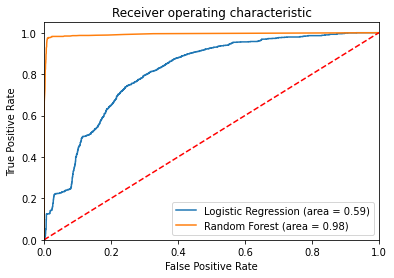

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#logistics
logit_roc_auc = roc_auc_score(y_test, model_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:,1])
# Random Forest
rf_roc_auc = roc_auc_score(y_test, model_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.

In [60]:
model_rf.feature_importances_

array([0.49518742, 0.18972013, 0.26992218, 0.01627707, 0.002914  ,
       0.00319321, 0.00320409, 0.00304865, 0.0109487 , 0.00558456])

In [61]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = model_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}    -> {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years    -> 0.29%
department_management    -> 0.30%
department_RandD    -> 0.32%
department_hr    -> 0.32%
salary_low    -> 0.56%
salary_high    -> 1.09%
Work_accident    -> 1.63%
last_evaluation    -> 18.97%
time_spend_company    -> 26.99%
satisfaction_level    -> 49.52%


According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company, in ascending order.